In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/blaban.csv", encoding="utf-8")
df.head()

,Name,Qashtota,Roz blaban,Cake,Kunafa,Ice cream,Crepe,Golash,Mille Feuille,Topping
0,Remontada,True,True,False,False,False,False,False,False,Mango
1,Dubai Kinder,False,False,True,True,False,False,False,False,Kinder
2,Dubai choco,False,False,True,True,False,False,False,False,Chocolate
3,Crème de la crème,False,False,True,True,False,False,False,False,Mango
4,Kabsa,False,False,True,True,False,False,False,False,Chocolate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           25 non-null     object
 1   Qashtota       25 non-null     bool  
 2   Roz blaban     25 non-null     bool  
 3   Cake           25 non-null     bool  
 4   Kunafa         25 non-null     bool  
 5   Ice cream      25 non-null     bool  
 6   Crepe          25 non-null     bool  
 7   Golash         25 non-null     bool  
 8   Mille Feuille  25 non-null     bool  
 9   Topping        25 non-null     object
dtypes: bool(8), object(2)
memory usage: 732.0+ bytes


In [ ]:
df['Topping'].value_counts()

,count
Topping,
Chocolate,8
Mango,5
Lotus,3
Kinder,2
Pistachio,2
None,2
Mango,2
Chocolate,1


In [ ]:
df['Topping'] =df['Topping'].str.strip()

In [ ]:
df['Topping'].value_counts()

,count
Topping,
Chocolate,9
Mango,7
Lotus,3
Kinder,2
Pistachio,2
None,2


In [ ]:
bool_cols = df.select_dtypes('bool').columns
bool_cols

Index(['Qashtota', 'Roz blaban', 'Cake', 'Kunafa', 'Ice cream', 'Crepe',
       'Golash', 'Mille Feuille'],
      dtype='object')

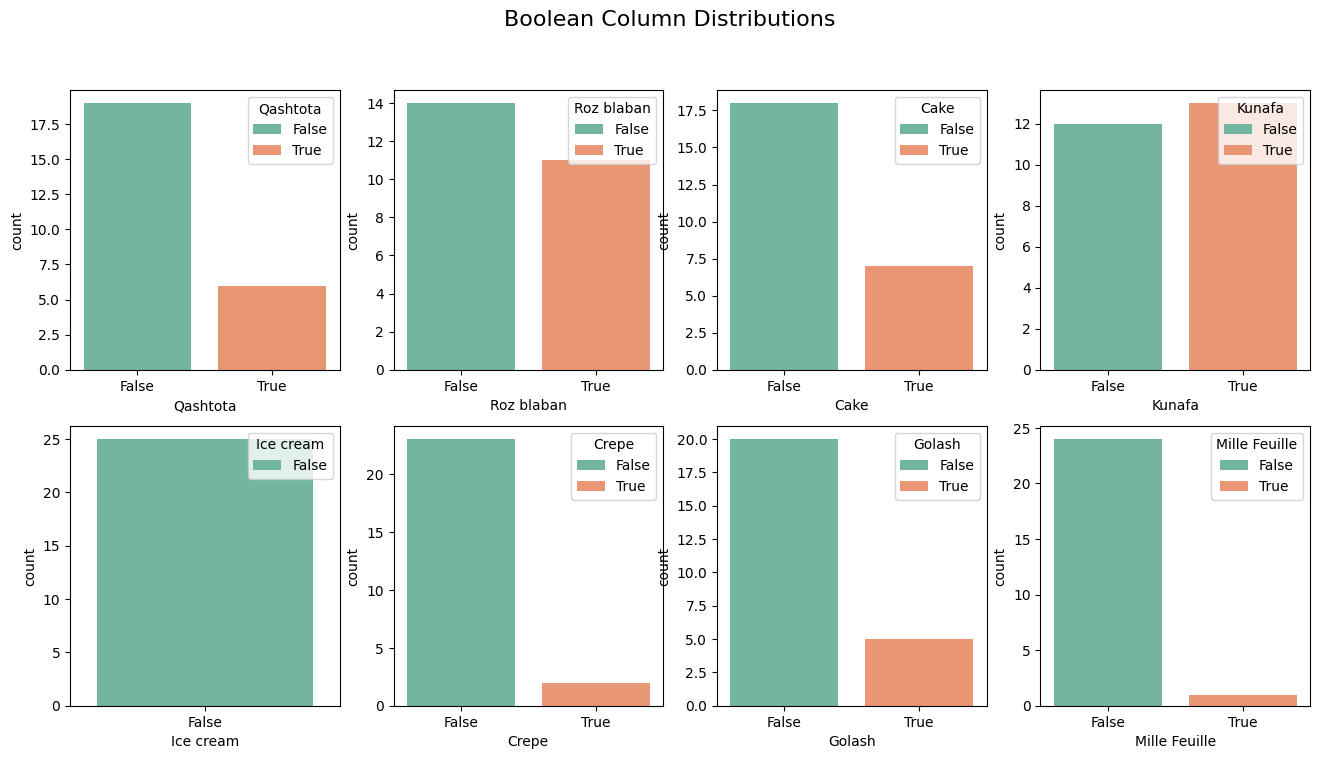

In [ ]:
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(bool_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', hue=col)


plt.suptitle('Boolean Column Distributions', fontsize=16)
plt.show()


In [ ]:
df = df.drop('Ice cream',axis=1)
df.head()

,Name,Qashtota,Roz blaban,Cake,Kunafa,Crepe,Golash,Mille Feuille,Topping
0,Remontada,True,True,False,False,False,False,False,Mango
1,Dubai Kinder,False,False,True,True,False,False,False,Kinder
2,Dubai choco,False,False,True,True,False,False,False,Chocolate
3,Crème de la crème,False,False,True,True,False,False,False,Mango
4,Kabsa,False,False,True,True,False,False,False,Chocolate


In [ ]:
df = pd.get_dummies(df, columns=['Topping'])
df.head()

,Name,Qashtota,Roz blaban,Cake,Kunafa,Crepe,Golash,Mille Feuille,Topping_Chocolate,Topping_Kinder,Topping_Lotus,Topping_Mango,Topping_None,Topping_Pistachio
0,Remontada,True,True,False,False,False,False,False,False,False,False,True,False,False
1,Dubai Kinder,False,False,True,True,False,False,False,False,True,False,False,False,False
2,Dubai choco,False,False,True,True,False,False,False,True,False,False,False,False,False
3,Crème de la crème,False,False,True,True,False,False,False,False,False,False,True,False,False
4,Kabsa,False,False,True,True,False,False,False,True,False,False,False,False,False


In [ ]:
df.set_index(df.columns[0], inplace=True)
df.head()

,Qashtota,Roz blaban,Cake,Kunafa,Crepe,Golash,Mille Feuille,Topping_Chocolate,Topping_Kinder,Topping_Lotus,Topping_Mango,Topping_None,Topping_Pistachio
Name,,,,,,,,,,,,,
Remontada,True,True,False,False,False,False,False,False,False,False,True,False,False
Dubai Kinder,False,False,True,True,False,False,False,False,True,False,False,False,False
Dubai choco,False,False,True,True,False,False,False,True,False,False,False,False,False
Crème de la crème,False,False,True,True,False,False,False,False,False,False,True,False,False
Kabsa,False,False,True,True,False,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)


KMeans(n_clusters=4, random_state=42)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score :", silhouette_avg)

Silhouette Score : 0.19585890515643725


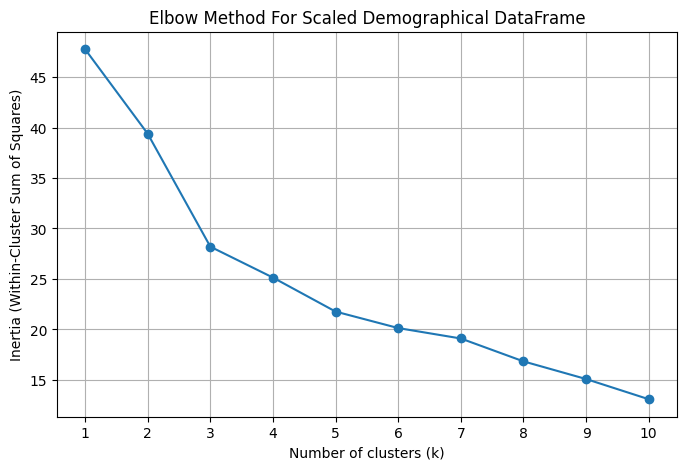

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Scaled Demographical DataFrame')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score :", silhouette_avg)

Silhouette Score : 0.2111405895484391


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df)
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score :", silhouette_avg)

Silhouette Score : 0.2139128987452366


We will choose the k=4 (until now)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df_with_clusters = df.copy()
df_with_clusters['cluster'] = kmeans.labels_

In [ ]:
df_with_clusters.head()

,Qashtota,Roz blaban,Cake,Kunafa,Crepe,Golash,Mille Feuille,Topping_Chocolate,Topping_Kinder,Topping_Lotus,Topping_Mango,Topping_None,Topping_Pistachio,cluster
Name,,,,,,,,,,,,,,
Remontada,True,True,False,False,False,False,False,False,False,False,True,False,False,2
Dubai Kinder,False,False,True,True,False,False,False,False,True,False,False,False,False,4
Dubai choco,False,False,True,True,False,False,False,True,False,False,False,False,False,0
Crème de la crème,False,False,True,True,False,False,False,False,False,False,True,False,False,4
Kabsa,False,False,True,True,False,False,False,True,False,False,False,False,False,0


In [ ]:
centroids = kmeans.cluster_centers_
features = df.columns

for i, centroid in enumerate(centroids):
    print(f"Cluster {i}:")
    for feature, value in zip(features, centroid):
        print(f"  {feature}: {value:.4f}")
    print()

Cluster 0:
  Qashtota: 0.0000
  Roz blaban: -0.0000
  Cake: 0.8000
  Kunafa: 0.8000
  Crepe: 0.4000
  Golash: 0.0000
  Mille Feuille: -0.0000
  Topping_Chocolate: 1.0000
  Topping_Kinder: -0.0000
  Topping_Lotus: 0.0000
  Topping_Mango: 0.0000
  Topping_None: -0.0000
  Topping_Pistachio: -0.0000

Cluster 1:
  Qashtota: 0.0000
  Roz blaban: 0.8333
  Cake: 0.0000
  Kunafa: 1.0000
  Crepe: 0.0000
  Golash: 0.8333
  Mille Feuille: 0.0000
  Topping_Chocolate: 0.1667
  Topping_Kinder: 0.1667
  Topping_Lotus: 0.1667
  Topping_Mango: 0.1667
  Topping_None: 0.0000
  Topping_Pistachio: 0.3333

Cluster 2:
  Qashtota: 0.6667
  Roz blaban: 0.3333
  Cake: 0.0000
  Kunafa: 0.0000
  Crepe: 0.0000
  Golash: 0.0000
  Mille Feuille: 0.1667
  Topping_Chocolate: 0.0000
  Topping_Kinder: 0.0000
  Topping_Lotus: 0.1667
  Topping_Mango: 0.6667
  Topping_None: 0.1667
  Topping_Pistachio: 0.0000

Cluster 3:
  Qashtota: 0.4000
  Roz blaban: 0.8000
  Cake: 0.0000
  Kunafa: 0.0000
  Crepe: -0.0000
  Golash: 0.0000

In [ ]:
for cluster_id in sorted(df_with_clusters['cluster'].unique()):
    indices = df_with_clusters[df_with_clusters['cluster'] == cluster_id].index.tolist()
    indices_str = ', '.join(str(idx) for idx in indices)
    print(f"Cluster {cluster_id} = row {indices_str}")


Cluster 0 = row Dubai choco, Kabsa, Crepe Dubai, Crepe Dubai mega, Dabadebo
Cluster 1 = row Cheese Bomb, Koshari pistacho, Koshari mango, Koshari choco, Koshari lotus, Koshari kinder
Cluster 2 = row Remontada, Loaa, Roz mango, Qashtota sada, Qashtota mango, Qashtota Lotus
Cluster 3 = row Roz sada, Roz Lotus, Roz choco, Qashtota choco, Qashtota Roz
Cluster 4 = row Dubai Kinder, Crème de la crème, Mambo


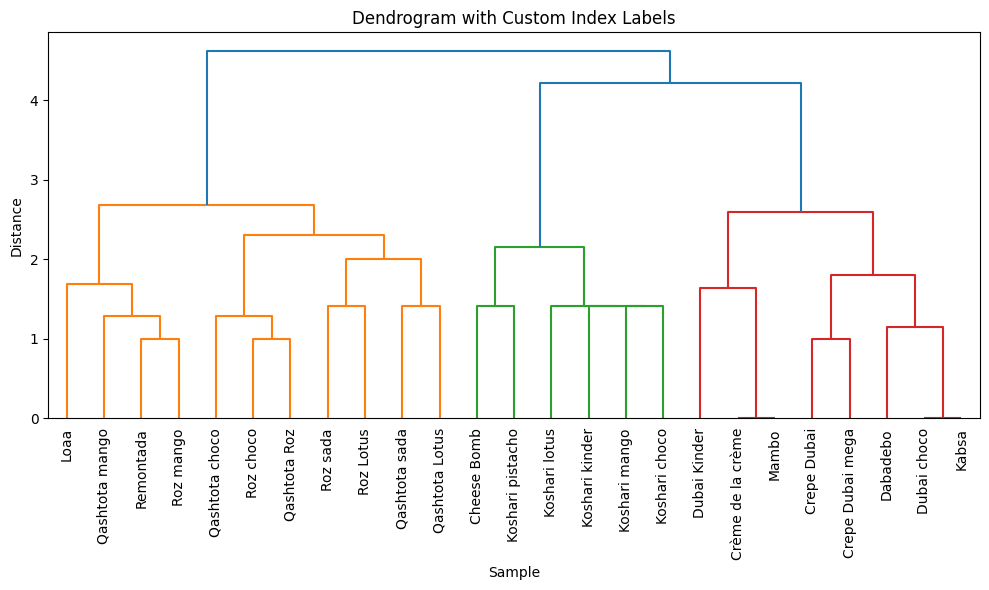

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(df, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=df.index.tolist(), leaf_rotation=90)
plt.title('Dendrogram with Custom Index Labels')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

